In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.backends.backend_pdf
import sqlalchemy

In [2]:
# Create a SQLAlchemy engine to connect to the MySQL database
engine1  = sqlalchemy.create_engine('mysql+pymysql://root:@localhost:3306/2024_02')
engine2  = sqlalchemy.create_engine('mysql+pymysql://root:@localhost:3306/2025_01')

floorsheet1 = pd.read_sql_table("floorsheet",engine1, columns = ["transaction_number","script","buyer","seller","quantity","rate","amount","date"])
floorsheet2 = pd.read_sql_table("floorsheet",engine2, columns = ["transaction_number","script","buyer","seller","quantity","rate","amount","date"])

In [3]:
floorsheet = pd.concat([floorsheet1, floorsheet2])

# Ensure the 'date' column is in datetime format
floorsheet['date'] = pd.to_datetime(floorsheet['date'])

In [4]:
# Create a SQLAlchemy engine to connect to the MySQL database
# engine = sqlalchemy.create_engine('mysql+pymysql://root:@localhost:3306/2024')

In [5]:

#  Define the start and end dates
# end_date = datetime.now()
# start_date = end_date - timedelta(days=180)

# # Query the required data directly from the MySQL database
# query = f"""
#     SELECT date, script, buyer, seller, quantity, rate
#     FROM floorsheet
#     WHERE date BETWEEN '{start_date.date()}' AND '{end_date.date()}'
# """
# floorsheet = pd.read_sql_query(query, engine)

# # Ensure the 'date' column is in datetime format
# floorsheet['date'] = pd.to_datetime(floorsheet['date'])

In [6]:
floorsheet.head()

,transaction_number,script,buyer,seller,quantity,rate,amount,date
0,2024070305004594,CIT,46,6,21,2133.0,44793.0,2024-07-03
1,2024070205004664,HRL,7,48,10,549.7,5497.0,2024-07-02
2,2024070205004665,BBC,57,57,11,3880.1,42681.1,2024-07-02
3,2024070105004119,NIFRA,52,29,54,190.0,10260.0,2024-07-01
4,2024070205004666,NRN,5,29,200,673.3,134660.0,2024-07-02


In [7]:
# Find the minimum rate and the corresponding date for each company
min_rate_data = floorsheet.loc[floorsheet.groupby('script')['rate'].idxmin()][['script', 'date', 'rate']]

# Sort the result by company name (script)
min_rate_data_sorted = min_rate_data.sort_values(by='script')

# Reset index for better readability
min_rate_data_sorted.reset_index(drop=True, inplace=True)

print(min_rate_data_sorted)

# Export the DataFrame to an Excel file
min_rate_data_sorted.to_excel('min_rate_data_sorted.xlsx', index=False)

      script       date    rate
0     ACLBSL 2024-09-25   961.0
1       ADBL 2024-07-01   256.5
2    ADBLD83 2024-07-23  1060.0
3        AHL 2024-07-01   499.0
4       AHPC 2025-01-01   245.0
..       ...        ...     ...
730    VLUCL 2025-01-06   695.0
731    VLUCL 2025-01-01   640.0
732    VLUCL 2024-07-01   500.5
733    VLUCL 2025-01-01   633.0
734     WNLB 2024-07-03  1393.0

[735 rows x 3 columns]


In [8]:

# Assuming floorsheet is already a merged DataFrame and date is in datetime format
floorsheet['date'] = pd.to_datetime(floorsheet['date'])

# Group by script to find the minimum rate
min_rate_per_script = floorsheet.groupby('script')['rate'].min().reset_index()

# Merge to get the corresponding dates for the minimum rates
min_rate_data = pd.merge(floorsheet, min_rate_per_script, on=['script', 'rate'])

# Sort the result by script and date to handle multiple minimum rates, if any
min_rate_data_sorted = min_rate_data.sort_values(by=['script', 'date']).drop_duplicates(subset='script', keep='first')

# Reset index for better readability
min_rate_data_sorted.reset_index(drop=True, inplace=True)

print(min_rate_data_sorted[['script', 'date', 'rate']])

# Export the DataFrame to an Excel file
min_rate_data_sorted[['script', 'date', 'rate']].to_excel('min_rate_data_sorted.xlsx', index=False)


      script       date    rate
0     ACLBSL 2024-09-25   961.0
1       ADBL 2024-07-01   256.5
2    ADBLD83 2024-07-23  1060.0
3        AHL 2024-07-01   499.0
4       AHPC 2024-07-01   146.1
..       ...        ...     ...
410     USLB 2024-09-29  1320.0
411     VLBS 2024-09-29   775.0
412   VLBSPO 2024-07-18   327.0
413    VLUCL 2024-07-01   500.5
414     WNLB 2024-07-03  1393.0

[415 rows x 3 columns]


In [9]:

# Assuming floorsheet is already a merged DataFrame and date is in datetime format
floorsheet['date'] = pd.to_datetime(floorsheet['date'])

# Group by script to find the maximum rate
max_rate_per_script = floorsheet.groupby('script')['rate'].max().reset_index()

# Merge to get the corresponding dates for the maximum rates
max_rate_data = pd.merge(floorsheet, max_rate_per_script, on=['script', 'rate'])

# Sort the result by script and date to handle multiple maximum rates, if any
max_rate_data_sorted = max_rate_data.sort_values(by=['script', 'date']).drop_duplicates(subset='script', keep='first')

# Reset index for better readability
max_rate_data_sorted.reset_index(drop=True, inplace=True)

print(max_rate_data_sorted[['script', 'date', 'rate']])

# Export the DataFrame to an Excel file
max_rate_data_sorted[['script', 'date', 'rate']].to_excel('max_rate_data_sorted.xlsx', index=False)


      script       date    rate
0     ACLBSL 2024-07-18  1491.0
1       ADBL 2024-08-18   428.4
2    ADBLD83 2024-11-17  1160.0
3        AHL 2024-07-30   904.0
4       AHPC 2024-08-25   349.0
..       ...        ...     ...
410     USLB 2025-03-06  2076.0
411     VLBS 2024-07-21  1174.0
412   VLBSPO 2024-12-08   495.0
413    VLUCL 2024-08-13   816.0
414     WNLB 2025-02-23  4271.0

[415 rows x 3 columns]


In [10]:
# Define the scripts to plot
Del_scripts = np.array(["ADBLD83","ADLB","ALICLP","BOKD86","CBLD88","CCBL","CCBD88","CMF1","CBLPO","CCBLPO","CMF2","CZBILP","EBLCP","EBLD86","GBBLPO","GBBD85","GBD80/81","GBILD86/87","GIMES1",
     "GRDBLP","GIBF1","GUFLPO","GWFD83","GBIMEP","HEIP","HIDCLP","ICFCD83","JBBLPO","KBLD86","KBLPO","KLBSLP","KEF","KSBBLP","KMCDBP","LBBLPO",
     "LBLD88","LBLPO","LEMF","KDBY","MBLD2085","MBLPO","MDBPO","MEROPO","MFLD85","MLBLPO","MMF1","MMFDBP","MNBBLP","MSLBP","NABILP","MEGAPO",
     'NBLD82', 'NBLD85',"NBF2", "NICSF", 'NCCBPO', 'NCCD86','NEF',  'NIBD2082','NIBLPF', 'NIBSF2',"NIBPO","NMBD87/88","PBLD87",  'NICAD8182', 'NICAD8283', 'NICAP',
     'NICBF', 'NICD83/84', 'NICFC', 'NICGF','NICLPO', 'NICSF','NLICLP',"NLO",  'NMB50', 'NMBD2085', 'NMBHF1',
     'NMBPO',  'NMFBSP','PBD85', 'PBD88',"RHPC", 'PBLD84', 'PBLD86', 'PCBLP',  'PFLPO','PROFLP', 'PRVUPO', 'RBCLPO','RLFLPO',
     'RMDCPO', 'RMF1', "PSF", 'RSDCP',"SAEF", "SEF","SLCF",'SAND2085','SAPDBLP',"SADBLP","SFCLP","SNMAPO", 'SBCF', 'SBD87', 'SBIBD86', 'SBLD2082',
     'SBLD83', 'SBLD84', 'SBLPO', 'SDBD87', 'SFMF', 'SHINEP', 'SIGS2',  'SINDUP', 'SLBBLP', 'SMFDBP',
     'SRBLD83', 'SRBLPO', 'SRD80','SWMFPO', 'VLBSPO',"CIZBD86","DDBLPO","EDBLPO","GBLBSP","HBLD83","ICFCPO","SMFDB","SAGF",
    "RMF2","PRSF","NSIF2","NIMBPO","NIBLGF","NBBD2085","LBLD86","LBL","SRBL","KLBS","BFCPO","SABSL","SDLBSL","MKLB",
    "NSLB","PLI","RMDC","RULB","C30MF","AKBSL","BOKL","CBL","FMDBLP","GILBPO","GMFILP","JFLPO","MEGA","SBID83","GSY","ICFCD88",
    "MPFLPO","NCCB","NIB","NIFRAUR85/86","NILPO","PIC","PICLPO","PLIC","SFEF","SIC","SIFCPO","SIL","SPILPO","SWBBLP","UIC","ULI","ALBSLP",
                        "CFCLPO","CITPO","HBLD86","HBLPO","JBBD87","KBLD89","LSLPO","LVF2","MBLD87","MFILPO","NADEPP","NRICP","RBBD83",
                        "SKBBLP","SMATAP","USLBP","EBLD85","LUK","NLBBLP","FOWADP","H8020","IGIPO","JSLBBP","KSBBLD87","KSY","LBBLD89",
                        "MLBLD89","MND84/85","NABILD87","NICAD85/86","NICD88","NIMBD90","NLICP","PMLIP","SBID89","SBLD89","SCBD","MNMF1",
                        "SIGS3","SJLICP","NIBLSTF","NIFRAP","NLBBL","MMFDB","BOKD86KA","GBILD84/85","PBD84","SBD89","CBBLPO","EICPO","GLICLP","NICGF2","MLBBLP","NMBD89/90"
                        "NIBSF1","NUBLPO","PLICPO","PRINPO","SICLPO","SICPO","SILPO","SLICLP","uli", "NMBD89/90","JALPA","KBLD90","BPW","NBF3","KLBSL","NFSPO"
                        
                        
    ])

# Remove the defined scripts
scripts = np.setdiff1d(floorsheet['script'].unique(), Del_scripts)

# Sort the scripts in alphabetical order
scripts = np.sort(scripts)

In [11]:
# Remove the defined scripts
floorsheet = floorsheet[~floorsheet['script'].isin(Del_scripts)]

# Sort the scripts in alphabetical order
floorsheet.sort_values(by='script', inplace=True)

In [12]:
floorsheet.tail(100)

,transaction_number,script,buyer,seller,quantity,rate,amount,date
252930,2025010703003716,WNLB,55,17,10,2541.0,25410.0,2025-01-07
9068143,2024100203016092,WNLB,58,28,30,3150.0,94500.0,2024-10-02
3332378,2024080503023055,WNLB,6,58,10,1530.0,15300.0,2024-08-05
3333878,2024080503021618,WNLB,13,8,11,1511.0,16621.0,2024-08-05
3334377,2024080503021134,WNLB,6,58,20,1530.0,30600.0,2024-08-05
...,...,...,...,...,...,...,...,...
3349876,2024080503005613,WNLB,6,22,20,1560.0,31200.0,2024-08-05
3349877,2024080503005305,WNLB,6,28,20,1555.0,31100.0,2024-08-05
3349878,2024080503005169,WNLB,47,28,10,1555.0,15550.0,2024-08-05
3343878,2024080503011240,WNLB,28,10,25,1539.0,38475.0,2024-08-05


In [13]:
import pandas as pd

floorsheet['date'] = pd.to_datetime(floorsheet['date'])

def calculate_top_broker_percentage(floorsheet):
    # Calculate buy and sell quantities
    buy = floorsheet.rename(columns={'buyer': 'Broker'}).groupby(["script", "Broker", "date"]).agg({'quantity': 'sum'}).rename(columns={'quantity': 'buy_quantity'})
    sell = floorsheet.rename(columns={'seller': 'Broker'}).groupby(["script", "Broker", "date"]).agg({'quantity': 'sum'}).rename(columns={'quantity': 'sell_quantity'})
    
    # Combine buy and sell data
    combined = pd.merge(buy, sell, how='outer', left_index=True, right_index=True).fillna(0)
    combined['Net_volume'] = combined['buy_quantity'] - combined['sell_quantity']
    
    # Calculate total traded quantity (buy + sell) for each script and date
    total_traded_quantity = floorsheet.groupby(['script', 'date'])['quantity'].sum().reset_index().rename(columns={'quantity': 'Total_traded_quantity'})
    
    # Reset index to make processing easier
    combined = combined.reset_index()
    
    # Find the top broker for each script and date
    top_brokers = combined.loc[combined.groupby(['script', 'date'])['Net_volume'].idxmax()]
    
    # Merge top brokers with total traded quantity data
    top_brokers = top_brokers.merge(total_traded_quantity, on=['script', 'date'])
    
    # Calculate the percentage contribution of the top broker
    top_brokers['Percentage'] = top_brokers.apply(
        lambda row: (row['Net_volume'] / row['Total_traded_quantity']) * 100 if row['Total_traded_quantity'] != 0 else 0,
        axis=1
    )
    
    # Pivot the data to have companies as columns and dates as rows
    result = top_brokers.pivot_table(values='Percentage', index='date', columns='script', aggfunc='mean')
    
    # Replace inf values with NaN and fill NaNs if needed
    result.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
    result.fillna(0, inplace=True)
    
    # Round to 2 decimal places
    result = result.round(2)
    
    return result

# Calculate the percentage data
percentage_data = calculate_top_broker_percentage(floorsheet)

# Export to Excel
output_file = 'top_broker_percentage.xlsx'
percentage_data.to_excel(output_file)

print(f"Results exported to {output_file}")


Results exported to top_broker_percentage.xlsx


In [14]:
# Calculate the buy amounts and sell amounts for each broker last week
buy_amounts = floorsheet.groupby(['buyer', 'date'])['amount'].sum().reset_index()
buy_amounts.rename(columns={'buyer': 'broker', 'amount': 'buy_amount'}, inplace=True)

sell_amounts = floorsheet.groupby(['seller', 'date'])['amount'].sum().reset_index()
sell_amounts.rename(columns={'seller': 'broker', 'amount': 'sell_amount'}, inplace=True)

# Merge buy and sell amounts
net_amounts = pd.merge(buy_amounts, sell_amounts, on=['broker', 'date'], how='outer').fillna(0)

# Calculate the net amount for each broker
net_amounts['net_amount'] = net_amounts['buy_amount'] - net_amounts['sell_amount']

# Calculate total buy and sell amounts to find top brokers
total_buy = buy_amounts.groupby('broker')['buy_amount'].sum()
total_sell = sell_amounts.groupby('broker')['sell_amount'].sum()

# Combine top brokers from buy and sell lists
top_brokers = set(total_buy.index).union(set(total_sell.index))

# Filter net amounts for top brokers
filtered_net_amounts = net_amounts[net_amounts['broker'].isin(top_brokers)]

# Calculate cumulative net amount for each broker
filtered_net_amounts['cumulative_net_amount'] = filtered_net_amounts.groupby('broker')['net_amount'].cumsum()

# Pivot the table for a clearer view
pivot_table = filtered_net_amounts.pivot(index='date', columns='broker', values='cumulative_net_amount').fillna(0)

# Get the final cumulative amounts for sorting brokers
final_cumulative_amounts = pivot_table.iloc[-1]
ordered_brokers = final_cumulative_amounts.sort_values(ascending=False).index

# Reorder pivot_table columns based on ordered_brokers
pivot_table = pivot_table[ordered_brokers]

# Save the result to an Excel file
pivot_table.to_excel('filtered_cumulative_net_amount_ALL.xlsx', sheet_name='Cumulative Net Amount')

# # Plot the results
# plt.style.use("seaborn-v0_8")
# fig, ax1 = plt.subplots(figsize=(12, 8))

# # Calculate the gradient color
# norm = plt.Normalize(vmin=pivot_table.values.min(), vmax=pivot_table.values.max())
# sm = plt.cm.ScalarMappable(cmap="RdYlGn", norm=norm)
# sm.set_array([])

# # Plot each broker with gradient color
# for broker in pivot_table.columns:
#     values = pivot_table[broker]
#     ax1.plot(pivot_table.index, values, label=broker, color=sm.to_rgba(values.iloc[-1]))

# # Title and labels
# ax1.set_title('Cumulative Net Amount by Top Brokers', fontsize=13)
# ax1.set_xlabel('Date', fontsize=13)
# ax1.set_ylabel('Cumulative Net Amount', fontsize=13)

# # Sort the legend according to the cumulative net amount on the last date
# handles, labels = ax1.get_legend_handles_labels()
# sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: final_cumulative_amounts[x[1]], reverse=True)
# sorted_handles, sorted_labels = zip(*sorted_handles_labels)

# # Add the sorted legend to the plot
# ax1.legend(sorted_handles, sorted_labels, title='Broker')

# plt.xticks(rotation=45)
# plt.tight_layout()

# # Save plot to a file
# #plt.savefig('filtered_cumulative_net_amount_plot_ALL.png')

# # Show plot
# #plt.show()

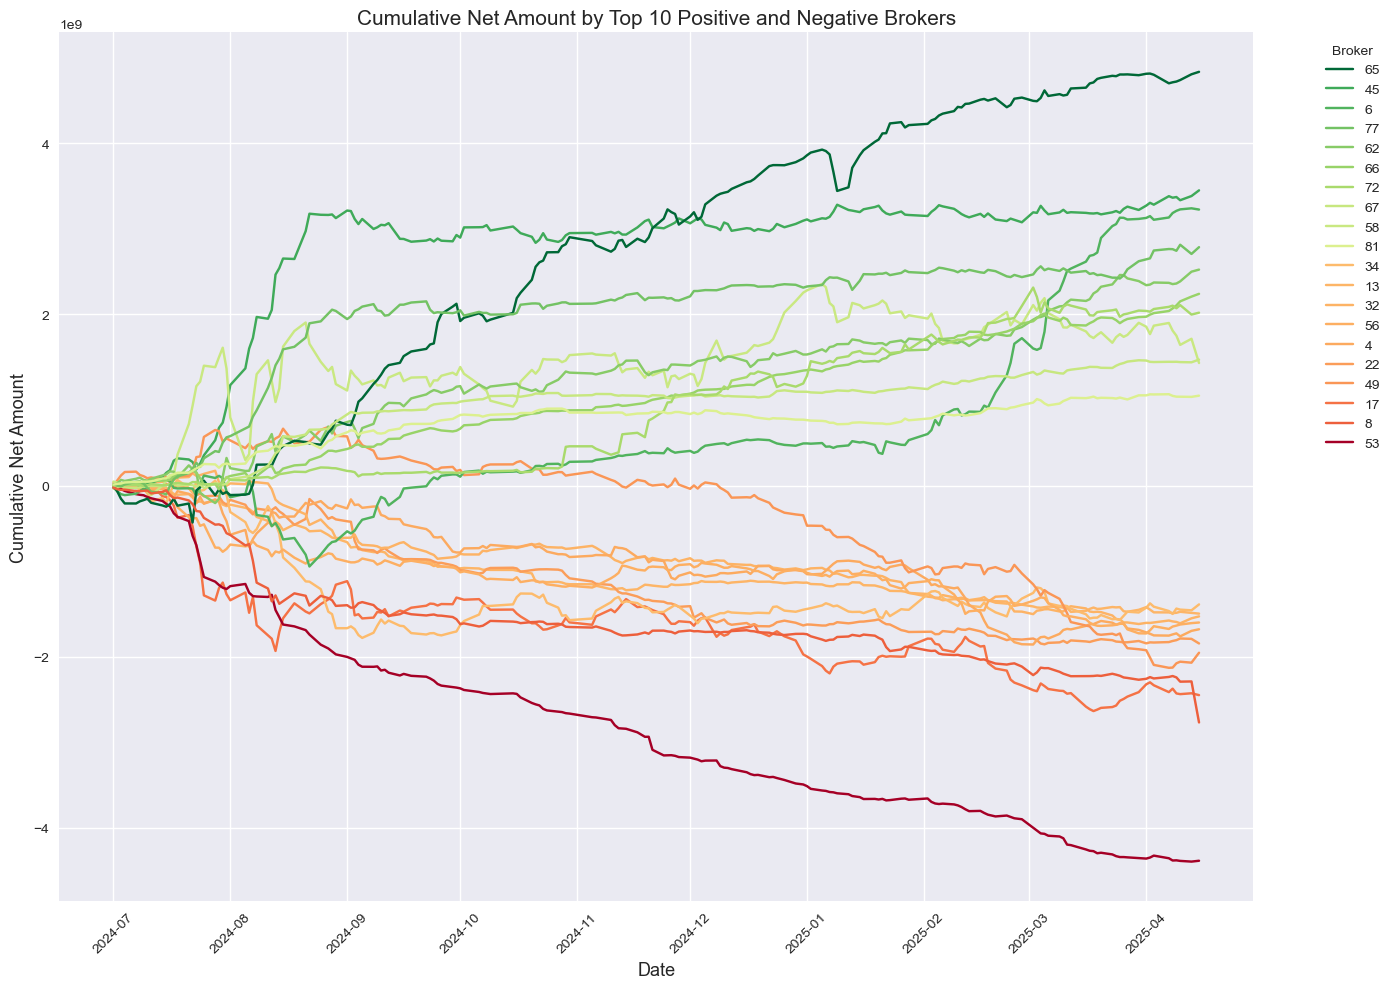

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Extract the final cumulative net amounts for each broker
final_cumulative_amounts = pivot_table.iloc[-1]

# Step 2: Identify the top 15 brokers with highest positive and negative cumulative net amounts
top_positive_brokers = final_cumulative_amounts.nlargest(10)
top_negative_brokers = final_cumulative_amounts.nsmallest(10)

# Combine top brokers from both positive and negative lists
top_brokers = top_positive_brokers.index.union(top_negative_brokers.index)

# Step 3: Filter the pivot table for the top brokers
filtered_pivot_table = pivot_table[top_brokers]

# Step 4: Plot the results with separate lines for each broker
plt.style.use("seaborn-v0_8")
fig, ax1 = plt.subplots(figsize=(14, 10))

# Calculate the gradient color
norm = plt.Normalize(vmin=filtered_pivot_table.values.min(), vmax=filtered_pivot_table.values.max())
sm = plt.cm.ScalarMappable(cmap="RdYlGn", norm=norm)
sm.set_array([])

# Plot each broker with gradient color
for broker in filtered_pivot_table.columns:
    values = filtered_pivot_table[broker]
    ax1.plot(filtered_pivot_table.index, values, label=broker, color=sm.to_rgba(values.iloc[-1]))

# Title and labels
ax1.set_title('Cumulative Net Amount by Top 10 Positive and Negative Brokers', fontsize=15)
ax1.set_xlabel('Date', fontsize=13)
ax1.set_ylabel('Cumulative Net Amount', fontsize=13)

# Sort the legend according to the cumulative net amount on the last date
handles, labels = ax1.get_legend_handles_labels()
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: final_cumulative_amounts[x[1]], reverse=True)
sorted_handles, sorted_labels = zip(*sorted_handles_labels)

# Add the sorted legend to the plot
ax1.legend(sorted_handles, sorted_labels, title='Broker', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()

# Save plot to a file
plt.savefig('filtered_cumulative_net_amount_plot_top_10.png')

# Show plot
plt.show()


In [16]:
#weekly
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Assuming 'floorsheet' is your DataFrame and 'date' column is in datetime format

# Filter data for the last 7 days
last_7_days = datetime.now() - timedelta(days=7)
recent_floorsheet = floorsheet[floorsheet['date'] >= last_7_days]

# Calculate the buy amounts and sell amounts for each broker in the last 7 days
buy_amounts = recent_floorsheet.groupby(['buyer', 'date'])['amount'].sum().reset_index()
buy_amounts.rename(columns={'buyer': 'broker', 'amount': 'buy_amount'}, inplace=True)

sell_amounts = recent_floorsheet.groupby(['seller', 'date'])['amount'].sum().reset_index()
sell_amounts.rename(columns={'seller': 'broker', 'amount': 'sell_amount'}, inplace=True)

# Merge buy and sell amounts
net_amounts = pd.merge(buy_amounts, sell_amounts, on=['broker', 'date'], how='outer').fillna(0)

# Calculate the net amount for each broker
net_amounts['net_amount'] = net_amounts['buy_amount'] - net_amounts['sell_amount']

# Calculate total buy and sell amounts to find top brokers
total_buy = buy_amounts.groupby('broker')['buy_amount'].sum()
total_sell = sell_amounts.groupby('broker')['sell_amount'].sum()

# Combine top brokers from buy and sell lists
top_brokers = set(total_buy.index).union(set(total_sell.index))

# Filter net amounts for top brokers
filtered_net_amounts = net_amounts[net_amounts['broker'].isin(top_brokers)]

# Calculate cumulative net amount for each broker
filtered_net_amounts['cumulative_net_amount'] = filtered_net_amounts.groupby('broker')['net_amount'].cumsum()

# Pivot the table for a clearer view
pivot_table = filtered_net_amounts.pivot(index='date', columns='broker', values='cumulative_net_amount').fillna(0)

# Get the final cumulative amounts for sorting brokers
final_cumulative_amounts = pivot_table.iloc[-1]
ordered_brokers = final_cumulative_amounts.sort_values(ascending=False).index

# Reorder pivot_table columns based on ordered_brokers
pivot_table = pivot_table[ordered_brokers]


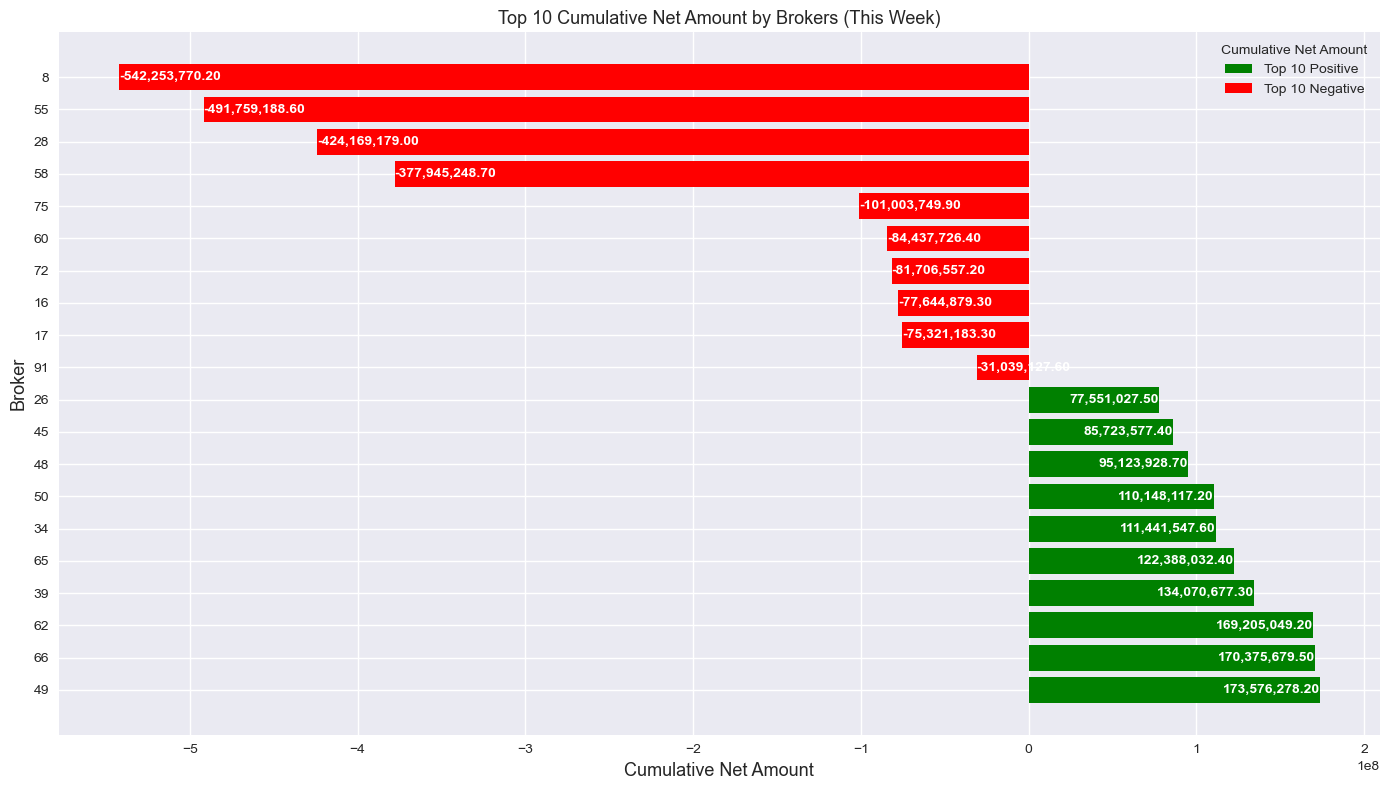

In [17]:
#weekly
# Assuming 'pivot_table' is your DataFrame with cumulative net amounts
# Filter the data for the last week
last_date = pivot_table.index.max()
first_date = last_date - timedelta(days=7)
last_week_data = pivot_table.loc[first_date:last_date]

# Calculate the final cumulative net amounts for the last week
last_week_cumulative = last_week_data.iloc[-1]

# Separate top 10 positive and top 10 negative cumulative amounts
top_positive_brokers = last_week_cumulative[last_week_cumulative > 0].nlargest(10)
top_negative_brokers = last_week_cumulative[last_week_cumulative < 0].nsmallest(10).sort_values(ascending=False)

# Plot the top 10 positive and top 10 negative amounts as side-by-side bar graphs
plt.style.use("seaborn-v0_8")
fig, ax = plt.subplots(figsize=(14, 8))

# Bar graph for top positive amounts
ax.barh(top_positive_brokers.index, top_positive_brokers.values, color='green', label='Top 10 Positive')

# Bar graph for top negative amounts
ax.barh(top_negative_brokers.index, top_negative_brokers.values, color='red', label='Top 10 Negative')

# Annotate bars with exact values inside the bars, making the text bold
for i, value in enumerate(top_positive_brokers.values):
    ax.text(value, i, f'{value:,.2f}', va='center', ha='right', color='white', fontsize=10, fontweight='bold')

# Annotate bars for negative values
for i, value in enumerate(top_negative_brokers.values):
    ax.text(value, i + len(top_positive_brokers), f'{value:,.2f}', 
            va='center', ha='left' if value < 0 else 'right', 
            color='white', fontsize=10, fontweight='bold')

# Add titles and labels
ax.set_title('Top 10 Cumulative Net Amount by Brokers (This Week)', fontsize=13)
ax.set_xlabel('Cumulative Net Amount', fontsize=13)
ax.set_ylabel('Broker', fontsize=13)

# Add grid and legend
ax.grid(True, axis='x')
ax.legend(title='Cumulative Net Amount')

# Save the plot to a file
plt.tight_layout()
plt.savefig('top_10_cumulative_net_amount_last_week.png')

# Show the plot
plt.show()


In [18]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import mplfinance as mpf

# # Load the data from the CSV file
# nepse_data = pd.read_csv('nepsealpha_export_price_NEPSE_2024-01-01_2024-08-13.csv')

# # Convert the 'Date' column to datetime
# nepse_data['Date'] = pd.to_datetime(nepse_data['Date'])

# # Remove commas from the 'Volume' column and convert it to float
# nepse_data['Volume'] = nepse_data['Volume'].str.replace(',', '').astype(float)

# # Set the 'Date' column as the index
# nepse_data.set_index('Date', inplace=True)

# # Rename columns to match mplfinance expected names
# nepse_data.rename(columns={
#     'Open': 'Open',
#     'High': 'High',
#     'Low': 'Low',
#     'Close': 'Close',
#     'Volume': 'Volume'
# }, inplace=True)

# # Load the floorsheet data
# #floorsheet = pd.read_csv('floorsheet.csv')

# # Convert the 'date' column to datetime
# #floorsheet['date'] = pd.to_datetime(floorsheet['date'])

# # Calculate the buy amounts and sell amounts for each broker and date
# buy_amounts = floorsheet.groupby(['buyer', 'date'])['amount'].sum().reset_index()
# buy_amounts.rename(columns={'buyer': 'broker', 'amount': 'buy_amount'}, inplace=True)

# sell_amounts = floorsheet.groupby(['seller', 'date'])['amount'].sum().reset_index()
# sell_amounts.rename(columns={'seller': 'broker', 'amount': 'sell_amount'}, inplace=True)
# #sell_amounts.rename(columns={'seller': 'broker', 'sell_amount'}, inplace=True)

# # Merge buy and sell amounts
# net_amounts = pd.merge(buy_amounts, sell_amounts, on=['broker', 'date'], how='outer').fillna(0)

# # Calculate the net amount for each broker
# net_amounts['net_amount'] = net_amounts['buy_amount'] - net_amounts['sell_amount']

# # Calculate total buy and sell amounts to find top brokers
# total_buy = buy_amounts.groupby('broker')['buy_amount'].sum().nlargest(15)
# total_sell = sell_amounts.groupby('broker')['sell_amount'].sum().nlargest(15)

# # Combine top brokers from buy and sell lists
# top_brokers = set(total_buy.index).union(set(total_sell.index))

# # Filter net amounts for top brokers
# filtered_net_amounts = net_amounts[net_amounts['broker'].isin(top_brokers)]

# # Calculate cumulative net amount for each broker
# filtered_net_amounts['cumulative_net_amount'] = filtered_net_amounts.groupby('broker')['net_amount'].cumsum()

# # Pivot the table for a clearer view
# pivot_table = filtered_net_amounts.pivot(index='date', columns='broker', values='cumulative_net_amount').fillna(0)

# # Get the final cumulative amounts for sorting brokers
# final_cumulative_amounts = pivot_table.iloc[-1]
# ordered_brokers = final_cumulative_amounts.sort_values(ascending=False).index

# # Reorder pivot_table columns based on ordered_brokers
# pivot_table = pivot_table[ordered_brokers]

# # Create the subplots
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), gridspec_kw={'height_ratios': [3, 2]})

# # Plot the NEPSE candlestick chart on ax1
# mpf.plot(nepse_data, type='candle', volume=True, style='charles', ax=ax1, title='NEPSE Stock Chart', ylabel='Price', ylabel_lower='Volume')

# # Plot the cumulative net amount data on ax2
# norm = plt.Normalize(vmin=pivot_table.values.min(), vmax=pivot_table.values.max())
# sm = plt.cm.ScalarMappable(cmap="RdYlGn", norm=norm)
# sm.set_array([])

# for broker in pivot_table.columns:
#     values = pivot_table[broker]
#     ax2.plot(pivot_table.index, values, label=broker, color=sm.to_rgba(values.iloc[-1]))

# # Title and labels for the second plot
# ax2.set_title('Cumulative Net Amount by Top Brokers', fontsize=13)
# ax2.set_xlabel('Date', fontsize=13)
# ax2.set_ylabel('Cumulative Net Amount', fontsize=13)

# # Sort the legend according to the cumulative net amount on the last date
# handles, labels = ax2.get_legend_handles_labels()
# sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: final_cumulative_amounts[x[1]], reverse=True)
# sorted_handles, sorted_labels = zip(*sorted_handles_labels)
# ax2.legend(sorted_handles, sorted_labels, title='Broker')

# plt.xticks(rotation=45)
# plt.tight_layout()

# # Save plot to a file
# plt.savefig('nepse_and_broker_cumulative_plot.png')

# # Show plot
# plt.show()


In [19]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import mplfinance as mpf
# from matplotlib.gridspec import GridSpec

# # Load the NEPSE data
# nepse_data = pd.read_csv('nepsealpha_export_price_NEPSE_2024-01-01_2024-08-13.csv')

# # Convert 'Date' column to datetime, remove time, and set as index
# nepse_data['Date'] = pd.to_datetime(nepse_data['Date']).dt.date
# nepse_data.set_index(pd.to_datetime(nepse_data['Date']), inplace=True)

# # Remove commas from the 'Volume' column and convert it to float
# nepse_data['Volume'] = nepse_data['Volume'].str.replace(',', '').astype(float)

# # Load the floorsheet data
# #floorsheet = pd.read_csv('floorsheet.csv')

# # Convert 'date' column to datetime, remove time
# floorsheet['date'] = pd.to_datetime(floorsheet['date']).dt.date

# # Calculate the buy amounts and sell amounts for each broker and date
# buy_amounts = floorsheet.groupby(['buyer', 'date'])['amount'].sum().reset_index()
# buy_amounts.rename(columns={'buyer': 'broker', 'amount': 'buy_amount'}, inplace=True)

# sell_amounts = floorsheet.groupby(['seller', 'date'])['amount'].sum().reset_index()
# sell_amounts.rename(columns={'seller': 'broker', 'amount': 'sell_amount'}, inplace=True)

# # Merge buy and sell amounts
# net_amounts = pd.merge(buy_amounts, sell_amounts, on=['broker', 'date'], how='outer').fillna(0)

# # Calculate the net amount for each broker
# net_amounts['net_amount'] = net_amounts['buy_amount'] - net_amounts['sell_amount']

# # Calculate total buy and sell amounts to find top brokers
# total_buy = buy_amounts.groupby('broker')['buy_amount'].sum().nlargest(15)
# total_sell = sell_amounts.groupby('broker')['sell_amount'].sum().nlargest(15)

# # Combine top brokers from buy and sell lists
# top_brokers = set(total_buy.index).union(set(total_sell.index))

# # Filter net amounts for top brokers
# filtered_net_amounts = net_amounts[net_amounts['broker'].isin(top_brokers)]

# # Calculate cumulative net amount for each broker
# filtered_net_amounts['cumulative_net_amount'] = filtered_net_amounts.groupby('broker')['net_amount'].cumsum()

# # Pivot the table for a clearer view
# pivot_table = filtered_net_amounts.pivot(index='date', columns='broker', values='cumulative_net_amount').fillna(0)

# # Align NEPSE and broker analysis data on dates
# aligned_dates = pd.to_datetime(pivot_table.index).intersection(nepse_data.index)
# nepse_data = nepse_data.loc[aligned_dates]
# pivot_table = pivot_table.loc[aligned_dates]

# # Create a figure with GridSpec for side-by-side plots
# fig = plt.figure(figsize=(14, 8))
# gs = GridSpec(1, 2, width_ratios=[2, 3])

# # Plot the NEPSE candlestick chart on the left subplot
# ax1 = fig.add_subplot(gs[0])
# mpf.plot(nepse_data, type='candle', style='charles', ax=ax1, ylabel='Price')
# ax1.set_title('NEPSE Stock Chart')

# # Plot the cumulative net amount data on the right subplot
# ax2 = fig.add_subplot(gs[1])
# norm = plt.Normalize(vmin=pivot_table.values.min(), vmax=pivot_table.values.max())
# sm = plt.cm.ScalarMappable(cmap="RdYlGn", norm=norm)
# sm.set_array([])

# for broker in pivot_table.columns:
#     values = pivot_table[broker]
#     ax2.plot(pivot_table.index, values, label=broker, color=sm.to_rgba(values.iloc[-1]))

# # Title and labels for the second plot
# ax2.set_title('Cumulative Net Amount by Top Brokers', fontsize=13)
# ax2.set_xlabel('Date', fontsize=13)
# ax2.set_ylabel('Cumulative Net Amount', fontsize=13)

# # Sort the legend according to the cumulative net amount on the last date
# handles, labels = ax2.get_legend_handles_labels()
# sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: pivot_table[x[1]].iloc[-1], reverse=True)
# sorted_handles, sorted_labels = zip(*sorted_handles_labels)
# ax2.legend(sorted_handles, sorted_labels, title='Broker')

# plt.xticks(rotation=45)
# plt.tight_layout()

# # Save plot to a file
# plt.savefig('nepse_and_broker_cumulative_side_by_side_plot.png')

# # Show plot
# plt.show()


In [20]:

# Function to calculate VWAP
def calculate_vwap(floorsheet):
    floorsheet['total_value'] = floorsheet['quantity'] * floorsheet['rate']
    vwap_data = floorsheet.groupby(['script', 'date']).apply(
        lambda x: x['total_value'].sum() / x['quantity'].sum()
    ).reset_index(name='VWAP')
    return vwap_data

# Group and process the data
def process_data(floorsheet):
    # Combine buyer and seller data with appropriate renaming
    buy = floorsheet.rename(columns={'buyer': 'Broker'}).groupby(["script", "Broker", "date"]).agg({'quantity': 'sum'}).rename(columns={'quantity': 'buy_quantity'})
    sell = floorsheet.rename(columns={'seller': 'Broker'}).groupby(["script", "Broker", "date"]).agg({'quantity': 'sum'}).rename(columns={'quantity': 'sell_quantity'})
    
    # Merge buy and sell data
    combined = pd.merge(buy, sell, how='outer', left_index=True, right_index=True).fillna(0)
    
    # Calculate net and cumulative volumes
    combined['Net_volume'] = combined['buy_quantity'] - combined['sell_quantity']
    combined['cumulative_volume'] = combined.groupby(['script', 'Broker'])['Net_volume'].cumsum()
    
    # Pivot table for easier plotting
    cumvol_temp = combined.pivot_table(values="cumulative_volume", index=['script', 'date'], columns="Broker")
    
    # Forward and backward fill missing values
    cumulative = cumvol_temp.groupby(['script']).apply(lambda x: x.ffill().bfill()).fillna(0)
    
    return cumulative

cumulative = process_data(floorsheet)
vwap_data = calculate_vwap(floorsheet)

# Plotting function
def plot_scripts(cumulative, vwap_data, filename="scripts_vwap.pdf"):
    plots_exist = False
    
    with matplotlib.backends.backend_pdf.PdfPages(filename) as pdf:
        plt.style.use("seaborn-v0_8")  # Correct style name
        
        for script in cumulative.index.get_level_values(0).unique():
            if script not in cumulative.index.get_level_values(0):
                continue
                
            # Get the cumulative volume of the last date for each broker
            last_date_cumulative = cumulative.loc[script].iloc[-1]
            
            # Filter the top 15 buy and sell brokers
            top_buy_brokers = last_date_cumulative[last_date_cumulative > 0].nlargest(6)
            top_sell_brokers = last_date_cumulative[last_date_cumulative < 0].nsmallest(6)
            
            if top_buy_brokers.empty and top_sell_brokers.empty:
                continue
            
            fig, ax1 = plt.subplots(figsize=(15, 8))
            
            # Plot cumulative volumes for the top brokers
            for broker in top_buy_brokers.index:
                broker_data = cumulative.loc[(script,), broker].reset_index()
                ax1.plot(broker_data['date'], broker_data[broker], label=f'Buy - {broker}')
            for broker in top_sell_brokers.index:
                broker_data = cumulative.loc[(script,), broker].reset_index()
                ax1.plot(broker_data['date'], broker_data[broker], label=f'Sell - {broker}')
            
            ax1.set_title(script, fontsize=13)
            ax1.set_xlabel("Date", fontsize=13)
            ax1.set_ylabel("Cumulative Volume", fontsize=13)
            
            # Plot VWAP on the secondary axis
            ax2 = ax1.twinx()
            vwap_data_script = vwap_data[vwap_data['script'] == script]
            ax2.plot(vwap_data_script['date'], vwap_data_script['VWAP'], color='green', linewidth=2, linestyle='--')
            ax2.set_ylabel('VWAP', fontsize=13)
            
            # Split the handles for buy and sell legends
            handles1, labels1 = ax1.get_legend_handles_labels()
            buy_handles = handles1[:len(top_buy_brokers)]
            sell_handles = handles1[len(top_buy_brokers):]
            buy_labels = labels1[:len(top_buy_brokers)]
            sell_labels = labels1[len(top_buy_brokers):]
            
            # Repositioning the legends
            buy_legend = ax1.legend(buy_handles, buy_labels, loc='upper left', bbox_to_anchor=(1.05, 1))
            sell_legend = ax1.legend(sell_handles, sell_labels, loc='lower left', bbox_to_anchor=(1.05, 0))
            ax1.add_artist(buy_legend)
            
            pdf.savefig(fig, bbox_inches='tight')  # Use bbox_inches='tight' to include legends
            plt.close(fig)
            plots_exist = True
    
    if not plots_exist:
        print("No plots were generated as no data was available for the specified scripts and date range.")

# Plot the scripts and save to a PDF
plot_scripts(cumulative, vwap_data)

In [21]:
# Group and process the data
def process_data(floorsheet):
    # Combine buyer and seller data with appropriate renaming
    buy = floorsheet.rename(columns={'buyer': 'Broker'}).groupby(["script", "Broker", "date"]).agg({'quantity': 'sum'}).rename(columns={'quantity': 'buy_quantity'})
    sell = floorsheet.rename(columns={'seller': 'Broker'}).groupby(["script", "Broker", "date"]).agg({'quantity': 'sum'}).rename(columns={'quantity': 'sell_quantity'})
    
    # Merge buy and sell data
    combined = pd.merge(buy, sell, how='outer', left_index=True, right_index=True).fillna(0)
    
    # Calculate net and cumulative volumes
    combined['Net_volume'] = combined['buy_quantity'] - combined['sell_quantity']
    combined['cummulative_volume'] = combined.groupby(['script', 'Broker'])['Net_volume'].cumsum()
    
    # Pivot table for easier plotting
    cumvol_temp = combined.pivot_table(values="cummulative_volume", index=['script', 'date'], columns="Broker")
    
    # Forward and backward fill missing values
    cummulative = cumvol_temp.groupby(['script']).apply(lambda x: x.ffill().bfill()).fillna(0)
    
    return cummulative

cummulative = process_data(floorsheet)

# Plotting function
def plot_scripts(scripts, cummulative, filename="45days.pdf"):
    plots_exist = False
    
    with matplotlib.backends.backend_pdf.PdfPages(filename) as pdf:
        plt.style.use("seaborn-v0_8")  # Correct style name
        
        for script in scripts:
            if script not in cummulative.index.get_level_values(0):
                continue
                
            # Get the cumulative volume of the last date for each broker
            last_date_cumulative = cummulative.loc[script].iloc[-1]
            
            # Filter the top 15 buy and sell brokers
            top_buy_brokers = last_date_cumulative[last_date_cumulative > 0].nlargest(15)
            top_sell_brokers = last_date_cumulative[last_date_cumulative < 0].nsmallest(15)
            
            if top_buy_brokers.empty and top_sell_brokers.empty:
                continue
            
            fig, ax = plt.subplots(figsize=(15, 8))
            
            # Plot cumulative volumes for the top brokers
            for broker in top_buy_brokers.index:
                broker_data = cummulative.loc[(script,), broker].reset_index()
                ax.plot(broker_data['date'], broker_data[broker], label=f'Buy - {broker}')
            for broker in top_sell_brokers.index:
                broker_data = cummulative.loc[(script,), broker].reset_index()
                ax.plot(broker_data['date'], broker_data[broker], label=f'Sell - {broker}')
            
            ax.set_title(script, fontsize=13)
            ax.set_xlabel("Date", fontsize=13)
            ax.set_ylabel("Cumulative Volume", fontsize=13)
            
            # Split the handles for buy and sell legends
            handles, labels = ax.get_legend_handles_labels()
            buy_handles = handles[:len(top_buy_brokers)]
            sell_handles = handles[len(top_buy_brokers):]
            buy_labels = labels[:len(top_buy_brokers)]
            sell_labels = labels[len(top_buy_brokers):]
            
            buy_legend = ax.legend(buy_handles, buy_labels, loc='center left', bbox_to_anchor=(1, 0.5))
            sell_legend = ax.legend(sell_handles, sell_labels, loc='center left', bbox_to_anchor=(1.2, 0.5))
            ax.add_artist(buy_legend)
            
            pdf.savefig(fig)
            plt.close(fig)
            plots_exist = True
    
    if not plots_exist:
        print("No plots were generated as no data was available for the specified scripts and date range.")

# Plot the scripts and save to a PDF
plot_scripts(scripts, cummulative)


In [22]:
def top_buy_brokers_cumulative_sum(cummulative, n=5):
    # Create a list to store the cumulative sums
    top_buy_cumulative_list = []

    # Iterate over each script
    for script in cummulative.index.get_level_values(0).unique():
        script_data = cummulative.loc[script]
        
        # Get the cumulative volume of the last date for each broker
        last_date_cumulative = script_data.iloc[-1]
        
        # Filter the top n buy brokers
        top_buy_brokers = last_date_cumulative[last_date_cumulative > 0].nlargest(n)
        
        if not top_buy_brokers.empty:
            # Sum the cumulative quantities for the top n buy brokers on the last date
            top_buy_sum = top_buy_brokers.sum()
            top_buy_cumulative_list.append({'script': script, 'top_5_buy_sum': top_buy_sum})

    # Convert the list to a DataFrame
    top_buy_cumulative_df = pd.DataFrame(top_buy_cumulative_list)

    return top_buy_cumulative_df

# Get the cumulative sum of top 5 buy brokers for individual scripts
top_5_buy_brokers_cumulative = top_buy_brokers_cumulative_sum(cummulative, n=5)

# Display the result
print(top_5_buy_brokers_cumulative)


     script  top_5_buy_sum
0    ACLBSL        51809.0
1      ADBL      1100392.0
2       AHL        93429.0
3      AHPC      1498509.0
4     AKJCL       702804.0
..      ...            ...
242    USHL        76126.0
243    USLB        73125.0
244    VLBS       151512.0
245   VLUCL       293474.0
246    WNLB        50912.0

[247 rows x 2 columns]


In [23]:

import pandas as pd

# Path to the CSV file
file_path = r'D:\NEPSE\Nepse_Python\Companies_info.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

  Company Name Promoter Holding Public Holding Government Holding  \
0        SAMAJ           57.00%         43.00%                  -   
1          BNT           90.78%          9.22%              0.00%   
2          UNL           85.00%         15.00%              0.00%   
3          BNL           90.78%          9.22%              0.00%   
4          NLO           67.30%         32.70%              0.00%   

  Foreign Ownership     Paid Up Capital  Market Capitalization  \
0                 -   NPR 22,850,000.00     NPR 479,850,000.00   
1             0.00%  NPR 121,000,000.00  NPR 15,440,931,000.00   
2            80.00%   NPR 92,100,000.00  NPR 36,242,271,000.00   
3             0.00%  NPR 194,888,700.00  NPR 30,110,304,150.00   
4             0.00%   NPR 60,643,700.00     NPR 153,671,135.80   

  Paid Up Capital2 Public Holdings  
0    22,850,000.00       98,255.00  
1   121,000,000.00      111,562.00  
2    92,100,000.00      138,150.00  
3   194,888,700.00      179,687.38  
4  

In [24]:
def top_buy_brokers_cumulative_sums(cummulative):
    # Create an empty list to store the results
    top_buy_cumulative_list = []

    # Iterate over each script
    for script in cummulative.index.get_level_values(0).unique():
        script_data = cummulative.loc[script]
        
        # Get the cumulative volume of the last date for each broker
        last_date_cumulative = script_data.iloc[-1]
        
        # Filter the top 5 buy brokers
        top_buy_brokers = last_date_cumulative[last_date_cumulative > 0].nlargest(5)
        
        # Calculate the sum of all positive brokers
        sum_positive_brokers = last_date_cumulative[last_date_cumulative > 0].sum()
        
        # Initialize cumulative sums for top 1 to 5 buy brokers
        top_1_buy_sum = top_2_buy_sum = top_3_buy_sum = top_4_buy_sum = top_5_buy_sum = 0
        
        # Calculate cumulative sums for each top buy broker
        if not top_buy_brokers.empty:
            top_1_buy_sum = top_buy_brokers.iloc[0]
            if len(top_buy_brokers) >= 2:
                top_2_buy_sum = top_1_buy_sum + top_buy_brokers.iloc[1]
            if len(top_buy_brokers) >= 3:
                top_3_buy_sum = top_2_buy_sum + top_buy_brokers.iloc[2]
            if len(top_buy_brokers) >= 4:
                top_4_buy_sum = top_3_buy_sum + top_buy_brokers.iloc[3]
            if len(top_buy_brokers) >= 5:
                top_5_buy_sum = top_4_buy_sum + top_buy_brokers.iloc[4]
        
        # Append the results to the list
        top_buy_cumulative_list.append({'script': script,
                                        'top_1_buy_sum': top_1_buy_sum,
                                        'top_2_buy_sum': top_2_buy_sum,
                                        'top_3_buy_sum': top_3_buy_sum,
                                        'top_4_buy_sum': top_4_buy_sum,
                                        'top_5_buy_sum': top_5_buy_sum,
                                        'sum_positive_brokers': sum_positive_brokers})

    # Convert the list to a DataFrame
    top_buy_cumulative_df = pd.DataFrame(top_buy_cumulative_list)

    return top_buy_cumulative_df

# Get the cumulative sums of top 1 to 5 buy brokers and sum of all positive brokers for individual scripts
top_buy_brokers_cumulative = top_buy_brokers_cumulative_sums(cummulative)

# Display the result
print(top_buy_brokers_cumulative)


     script  top_1_buy_sum  top_2_buy_sum  top_3_buy_sum  top_4_buy_sum  \
0    ACLBSL        19775.0        31110.0        39231.0        45639.0   
1      ADBL       437902.0       684554.0       928614.0      1023933.0   
2       AHL        39728.0        60998.0        75958.0        86618.0   
3      AHPC       502591.0       823290.0      1089627.0      1295505.0   
4     AKJCL       153002.0       300776.0       448004.0       586925.0   
..      ...            ...            ...            ...            ...   
242    USHL        26983.0        42547.0        56118.0        67254.0   
243    USLB        22528.0        38557.0        51792.0        62600.0   
244    VLBS        56077.0       102980.0       124091.0       140086.0   
245   VLUCL       152103.0       193235.0       228302.0       262175.0   
246    WNLB        43379.0        46089.0        47973.0        49799.0   

     top_5_buy_sum  sum_positive_brokers  
0          51809.0              107992.0  
1        1100

In [25]:
import xlsxwriter

In [26]:
import pandas as pd
import xlsxwriter

# Define the file path for the Excel file
file_path = 'result_data_with_percentages.xlsx'


# Create a Pandas Excel writer using xlsxwriter as the engine
with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
    # Write the DataFrame to the Excel sheet
    top_buy_brokers_cumulative.to_excel(writer, sheet_name='Top_Buy_Brokers_Cumulative', index=False)

    # Access the workbook and worksheet objects
    workbook = writer.book
    worksheet = writer.sheets['Top_Buy_Brokers_Cumulative']

    # Add a format with top alignment for the top of the cell
    top_alignment_format = workbook.add_format({'align': 'top'})

    # Calculate the percentages for each top column
    percentages = {}
    for i in range(1, 6):
        percentages[f'top_{i}_buy_sum'] = (top_buy_brokers_cumulative[f'top_{i}_buy_sum'] / top_buy_brokers_cumulative['sum_positive_brokers']) * 100

    # Iterate over each row
    for row_num in range(len(top_buy_brokers_cumulative)):
        # Iterate over each top column
        for i in range(1, 6):
            # Get the percentage value
            percentage_value = percentages[f'top_{i}_buy_sum'].iloc[row_num]
            # Set the cell content to the percentage value
            cell_content = f"{percentage_value:.2f}%"
            # Write the cell content to the cell
            worksheet.write(row_num + 1, len(top_buy_brokers_cumulative.columns) + i - 1, cell_content, top_alignment_format)

# Print a message indicating the Excel file has been created
print(f"DataFrame has been exported to '{file_path}'.")


DataFrame has been exported to 'result_data_with_percentages.xlsx'.


In [27]:
# Calculate daily volume for volume bars
daily_volume = floorsheet.groupby(['script', 'date'])['quantity'].sum().reset_index()

# Plotting function
def plot_scripts(cumulative, vwap_data, daily_volume, filename="scripts_vwap_vol.pdf"):
    plots_exist = False
    
    with matplotlib.backends.backend_pdf.PdfPages(filename) as pdf:
        plt.style.use("seaborn-v0_8")  # Correct style name
        
        for script in cumulative.index.get_level_values(0).unique():
            if script not in cumulative.index.get_level_values(0):
                continue
                
            # Get the cumulative volume of the last date for each broker
            last_date_cumulative = cumulative.loc[script].iloc[-1]
            
            # Filter the top 15 buy and sell brokers
            top_buy_brokers = last_date_cumulative[last_date_cumulative > 0].nlargest(6)
            top_sell_brokers = last_date_cumulative[last_date_cumulative < 0].nsmallest(6)
            
            if top_buy_brokers.empty and top_sell_brokers.empty:
                continue
            
            fig, ax1 = plt.subplots(figsize=(15, 8))
            ax2 = ax1.twinx()  # Secondary y-axis for VWAP
            
            # Plot cumulative volumes for the top brokers
            for broker in top_buy_brokers.index:
                broker_data = cumulative.loc[(script,), broker].reset_index()
                ax1.plot(broker_data['date'], broker_data[broker], label=f'Buy - {broker}')
            for broker in top_sell_brokers.index:
                broker_data = cumulative.loc[(script,), broker].reset_index()
                ax1.plot(broker_data['date'], broker_data[broker], label=f'Sell - {broker}')
            
            ax1.set_title(script, fontsize=13)
            ax1.set_xlabel("Date", fontsize=13)
            ax1.set_ylabel("Cumulative Volume", fontsize=13)
            
            # Plot VWAP on the secondary axis
            vwap_data_script = vwap_data[vwap_data['script'] == script]
            ax2.plot(vwap_data_script['date'], vwap_data_script['VWAP'], color='green', linewidth=2, linestyle='--', label='VWAP')
            ax2.set_ylabel('VWAP', fontsize=13)
            
            # Plot daily volume bars on primary axis
            script_daily_volume = daily_volume[daily_volume['script'] == script]
            ax1.bar(script_daily_volume['date'], script_daily_volume['quantity'], alpha=0.3, color='grey', width=0.5, label='Daily Volume')
            
            # Split the handles for buy and sell legends
            handles1, labels1 = ax1.get_legend_handles_labels()
            buy_handles = handles1[:len(top_buy_brokers)]
            sell_handles = handles1[len(top_buy_brokers):len(top_buy_brokers) + len(top_sell_brokers)]
            volume_handles = handles1[len(top_buy_brokers) + len(top_sell_brokers):]
            buy_labels = labels1[:len(top_buy_brokers)]
            sell_labels = labels1[len(top_buy_brokers):len(top_buy_brokers) + len(top_sell_brokers)]
            volume_labels = labels1[len(top_buy_brokers) + len(top_sell_brokers):]
            
            # Repositioning the legends
            buy_legend = ax1.legend(buy_handles, buy_labels, loc='upper left', bbox_to_anchor=(1.05, 1))
            sell_legend = ax1.legend(sell_handles, sell_labels, loc='center left', bbox_to_anchor=(1.05, 0.5))
            volume_legend = ax1.legend(volume_handles, volume_labels, loc='lower left', bbox_to_anchor=(1.05, 0))
            ax1.add_artist(buy_legend)
            ax1.add_artist(sell_legend)
            
            # Add VWAP legends to secondary axis
            handles2, labels2 = ax2.get_legend_handles_labels()
            ax2.legend(handles2, labels2, loc='upper right')
            
            pdf.savefig(fig, bbox_inches='tight')  # Use bbox_inches='tight' to include legends
            plt.close(fig)
            plots_exist = True
    
    if not plots_exist:
        print("No plots were generated as no data was available for the specified scripts and date range.")

# Plot the scripts and save to a PDF
plot_scripts(cumulative, vwap_data, daily_volume)

In [28]:
# Ensure the 'date' column is in datetime format
floorsheet['date'] = pd.to_datetime(floorsheet['date'])

# Get the current date and time
current_date = datetime.now()

# Calculate the date one week ago
one_week_ago = current_date - timedelta(days=30)

# Filter the DataFrame to include only the rows from the last week
last_week_floorsheet = floorsheet[floorsheet['date'] >= one_week_ago]

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Define scripts to analyze
scripts_to_analyze = ['ACLBSL', 'ADBL', 'AHL', 'AHPC', 'AKJCL', 'AKPL', 'ALBSL', 'ALICL',
       'ANLB', 'API', 'AVYAN', 'BARUN', 'BBC', 'BEDC', 'BFC', 'BGWT',
       'BHDC', 'BHL', 'BHPL', 'BNHC', 'BNT', 'BPCL', 'BPW', 'CBBL',
       'CFCL', 'CGH', 'CHCL', 'CHDC', 'CHL', 'CIT', 'CITY', 'CKHL', 'CLI',
       'CORBL', 'CYCL', 'CZBIL', 'DDBL', 'DHPL', 'DLBS', 'DOLTI', 'DORDI',
       'EBL', 'EDBL', 'EHPL', 'ENL', 'FMDBL', 'FOWAD', 'GBBL', 'GBIME',
       'GBLBS', 'GCIL', 'GFCL', 'GHL', 'GILB', 'GLBSL', 'GLH', 'GMFBS',
       'GMFIL', 'GRDBL', 'GUFL', 'GVL', 'HATHY', 'HBL', 'HDHPC', 'HDL',
       'HEI', 'HHL', 'HIDCL', 'HLBSL', 'HLI', 'HPPL', 'HRL', 'HURJA',
       'ICFC', 'IGI', 'IHL', 'ILBS', 'ILI', 'JALPA', 'JBBL', 'JBLB',
       'JFL', 'JOSHI', 'JSLBB', 'KBL', 'KBSH', 'KDL', 'KKHC', 'KLBSL',
       'KMCDB', 'KPCL', 'KRBL', 'KSBBL', 'LBBL', 'LEC', 'LICN', 'LLBS',
       'LSL', 'MAKAR', 'MANDU', 'MBJC', 'MBL', 'MCHL', 'MDB', 'MEHL',
       'MEL', 'MEN', 'MERO', 'MFIL', 'MHCL', 'MHL', 'MHNL', 'MKCL',
       'MKHC', 'MKHL', 'MKJC', 'MLBBL', 'MLBL', 'MLBS', 'MLBSL',
       'MMKJL', 'MNBBL', 'MPFL', 'MSHL', 'MSLB', 'NABBC', 'NABIL',
       'NADEP', 'NBL', 'NESDO', 'NFS', 'NGPL', 'NHDL', 'NHPC', 'NICA',
       'NICL', 'NICLBSL', 'NIFRA', 'NIL', 'NIMB', 'NLG', 'NLIC', 'NLICL',
       'NMB', 'NMBMF', 'NMFBS', 'NMLBBL', 'NRIC', 'NRM', 'NRN', 'NTC',
       'NUBL', 'NYADI', 'OHL', 'PCBL', 'PFL', 'PHCL', 'PMHPL', 'PMLI',
       'PPCL', 'PPL', 'PRIN', 'PROFL', 'PRVU', 'RADHI', 'RAWA', 'RBCL',
       'RFPL', 'RHGCL', 'RHPL', 'RIDI', 'RLFL', 'RNLI', 'RSDC', 'RURU', 'SADBL', 'SAHAS', 'SALICO', 'SAMAJ', 'SANIMA', 'SAPDBL',
       'SARBTM', 'SBI', 'SBL', 'SCB', 'SFCL', 'SGHC', 'SGIC',
       'SHEL', 'SHINE', 'SHIVM', 'SHL', 'SHLB', 'SHPC', 'SICL', 'SIFC',
       'SIKLES', 'SINDU', 'SJCL', 'SJLIC', 'SKBBL', 'SLBBL', 'SLBSL',
       'SMATA', 'SMB', 'SMFBS', 'SMH', 'SMHL', 'SMJC', 'SNLI', 'SONA',
       'SPC', 'SPDL', 'SPHL', 'SPIL', 'SPL', 'SRLI', 'SSHL', 'STC',
       'SWBBL', 'SWMF', 'TAMOR', 'TPC', 'TRH', 'TSHL', 'TVCL', 'UAIL',
       'UHEWA', 'ULBSL', 'ULHC', 'UMHL', 'UMRH', 'UNHPL', 'UNL', 'UNLB',
       'UPCL', 'UPPER', 'USHEC', 'USHL', 'USLB', 'VLBS', 'VLUCL', 'WNLB',"MNMF1","SBID83","GSY"]

# Sort the floorsheet data by transaction_number
floorsheet_sorted = last_week_floorsheet.sort_values(by='transaction_number')

# Generate a separate column for transaction value
floorsheet_sorted['transaction_value'] = floorsheet_sorted['rate'] * floorsheet_sorted['quantity']

# Filter data for specific scripts
filtered_data = floorsheet_sorted[floorsheet_sorted['script'].isin(scripts_to_analyze)]

# Calculate VWAP (Volume Weighted Average Price)
vwap_data = filtered_data.groupby(['date', 'script']).apply(
    lambda x: (x['rate'] * x['quantity']).sum() / x['quantity'].sum()
).reset_index(name='VWAP')

# Aggregate quantities and transaction values for each Buyer where script is the same
agg_buyers = filtered_data.groupby(['date', 'script', 'buyer']).agg({
    'quantity': 'sum',
    'transaction_value': 'sum'
}).reset_index()

# Filter buyers with transaction values greater than 100,000
result_buyers = agg_buyers[agg_buyers['transaction_value'] > 5000000]

# Calculate cumulative sum for buyers
result_buyers['cumulative_quantity'] = result_buyers.groupby(['script'])['quantity'].cumsum()

# Aggregate quantities and transaction values for each Seller where script is the same
agg_sellers = filtered_data.groupby(['date', 'script', 'seller']).agg({
    'quantity': 'sum',
    'transaction_value': 'sum'
}).reset_index()

# Filter sellers with transaction values greater than 100,000
result_sellers = agg_sellers[agg_sellers['transaction_value'] > 5000000]

# Calculate cumulative sum for sellers
result_sellers['cumulative_quantity'] = result_sellers.groupby(['script'])['quantity'].cumsum()

# Create a PDF file to save the plots
pdf_path = 'cumulative_sum_buyers_sellers_vwap200.pdf'
with PdfPages(pdf_path) as pdf:
    for script in scripts_to_analyze:
        plt.figure(figsize=(14, 7))

        # Plot buyers cumulative sum
        ax1 = plt.gca()
        buyers_data = result_buyers[result_buyers['script'] == script]
        ax1.plot(buyers_data['date'], buyers_data['cumulative_quantity'], label=f'Buyers - {script}', marker='o', color='blue')

        # Plot sellers cumulative sum
        sellers_data = result_sellers[result_sellers['script'] == script]
        ax1.plot(sellers_data['date'], sellers_data['cumulative_quantity'], label=f'Sellers - {script}', marker='x', color='red')

        ax1.set_xlabel('Date', fontsize=13)
        ax1.set_ylabel('Cumulative Quantity', fontsize=13)
        ax1.set_title(f'Cumulative Sum of Buyers and Sellers for {script}', fontsize=15)
        ax1.legend(loc='upper left')
        ax1.grid(True)
        ax1.tick_params(axis='x', rotation=45)

        # Plot VWAP on the secondary axis
        ax2 = ax1.twinx()
        vwap_data_script = vwap_data[vwap_data['script'] == script]
        ax2.plot(vwap_data_script['date'], vwap_data_script['VWAP'], color='green', linewidth=2, linestyle='--')
        ax2.set_ylabel('VWAP', fontsize=13)

        plt.tight_layout()

        # Save the plot to the PDF
        pdf.savefig()
        plt.close()

# Export the data to Excel
with pd.ExcelWriter('buyer_seller_quantities_analysisVWAP200.xlsx') as writer:
    result_buyers.to_excel(writer, sheet_name='Buyers', index=False)
    result_sellers.to_excel(writer, sheet_name='Sellers', index=False)

print("PDF and Excel files have been created successfully.")


C:\Users\Acer\AppData\Local\Temp\ipykernel_83856\2980113413.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_buyers['cumulative_quantity'] = result_buyers.groupby(['script'])['quantity'].cumsum()
C:\Users\Acer\AppData\Local\Temp\ipykernel_83856\2980113413.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_sellers['cumulative_quantity'] = result_sellers.groupby(['script'])['quantity'].cumsum()


PDF and Excel files have been created successfully.


Overall (buy - sell) data has been calculated, plotted, and saved successfully.


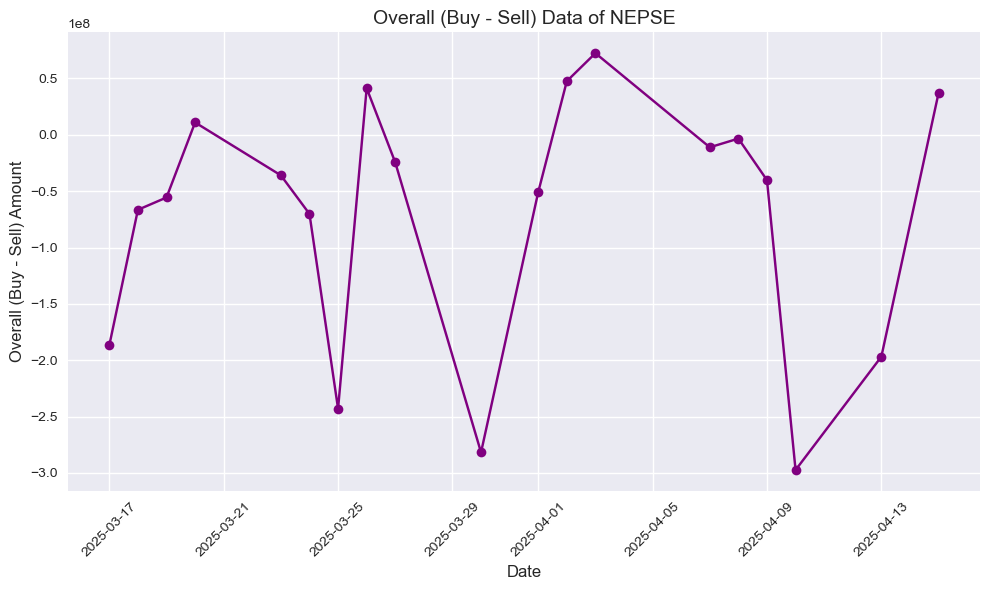

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for buyers with transaction values greater than 5,000,000
filtered_buyers = agg_buyers[agg_buyers['transaction_value'] > 5000000]

# Filter data for sellers with transaction values greater than 5,000,000
filtered_sellers = agg_sellers[agg_sellers['transaction_value'] > 5000000]

# Calculate the overall (buy - sell) amount for each date
overall_buy_sell = pd.DataFrame()

overall_buy_sell['date'] = filtered_buyers['date'].unique()
overall_buy_sell['buy_amount'] = filtered_buyers.groupby('date')['transaction_value'].sum().values
overall_buy_sell['sell_amount'] = filtered_sellers.groupby('date')['transaction_value'].sum().values

# Calculate the difference (buy - sell) amount
overall_buy_sell['buy_minus_sell'] = overall_buy_sell['buy_amount'] - overall_buy_sell['sell_amount']

# Plotting the overall (buy - sell) data
plt.figure(figsize=(10, 6))
plt.plot(overall_buy_sell['date'], overall_buy_sell['buy_minus_sell'], marker='o', linestyle='-', color='purple')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Overall (Buy - Sell) Amount', fontsize=12)
plt.title('Overall (Buy - Sell) Data of NEPSE', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig('overall_buy_sell_analysisVWAP2020.pdf')

# Export the overall buy-sell data to Excel
overall_buy_sell.to_excel('overall_buy_sell_analysisVWAP200.xlsx', index=False)

print("Overall (buy - sell) data has been calculated, plotted, and saved successfully.")


In [31]:
# Sort the floorsheet data by transaction_number
floorsheet_sorted = last_week_floorsheet.sort_values(by='transaction_number')

# Generate a separate column for transaction value
floorsheet_sorted['transaction_value'] = floorsheet_sorted['rate'] * floorsheet_sorted['quantity']

# Filter data for specific scripts
filtered_data = floorsheet_sorted[floorsheet_sorted['script'].isin(scripts_to_analyze)]

# Calculate VWAP (Volume Weighted Average Price)
vwap_data = filtered_data.groupby(['date', 'script']).apply(
    lambda x: (x['rate'] * x['quantity']).sum() / x['quantity'].sum()
).reset_index(name='VWAP')

# Aggregate quantities and transaction values for each Buyer where script is the same
agg_buyers = filtered_data.groupby(['date', 'script', 'buyer']).agg({
    'quantity': 'sum',
    'transaction_value': 'sum'
}).reset_index()

# Filter buyers with transaction values greater than 2,000,000
result_buyers = agg_buyers[agg_buyers['transaction_value'] > 2000000].copy()

# Calculate cumulative sum for buyers
result_buyers['cumulative_quantity'] = result_buyers.groupby(['script'])['quantity'].cumsum()

# Aggregate quantities and transaction values for each Seller where script is the same
agg_sellers = filtered_data.groupby(['date', 'script', 'seller']).agg({
    'quantity': 'sum',
    'transaction_value': 'sum'
}).reset_index()

# Filter sellers with transaction values greater than 2,000,000
result_sellers = agg_sellers[agg_sellers['transaction_value'] > 2000000].copy()

# Calculate cumulative sum for sellers
result_sellers['cumulative_quantity'] = result_sellers.groupby(['script'])['quantity'].cumsum()

# Create a PDF file to save the plots
pdf_path = 'cumulative_sum_buyers_sellers_vwap_last_week.pdf'
with PdfPages(pdf_path) as pdf:
    for script in scripts_to_analyze:
        plt.figure(figsize=(14, 7))

        # Plot buyers cumulative sum
        ax1 = plt.gca()
        buyers_data = result_buyers[result_buyers['script'] == script]
        ax1.plot(buyers_data['date'], buyers_data['cumulative_quantity'], label=f'Buyers - {script}', marker='o', color='blue')

        # Plot sellers cumulative sum
        sellers_data = result_sellers[result_sellers['script'] == script]
        ax1.plot(sellers_data['date'], sellers_data['cumulative_quantity'], label=f'Sellers - {script}', marker='x', color='red')

        ax1.set_xlabel('Date', fontsize=13)
        ax1.set_ylabel('Cumulative Quantity', fontsize=13)
        ax1.set_title(f'Cumulative Sum of Buyers and Sellers for {script}', fontsize=15)
        ax1.legend(loc='upper left')
        ax1.grid(True)
        ax1.tick_params(axis='x', rotation=45)

        # Plot VWAP on the secondary axis
        ax2 = ax1.twinx()
        vwap_data_script = vwap_data[vwap_data['script'] == script]
        ax2.plot(vwap_data_script['date'], vwap_data_script['VWAP'], color='green', linewidth=2, linestyle='--')
        ax2.set_ylabel('VWAP', fontsize=13)

        plt.tight_layout()

        # Save the plot to the PDF
        pdf.savefig()
        plt.close()

# Export the data to Excel
with pd.ExcelWriter('buyer_seller_quantities_analysisVWAP20.xlsx') as writer:
    result_buyers.to_excel(writer, sheet_name='Buyers', index=False)
    result_sellers.to_excel(writer, sheet_name='Sellers', index=False)

print("PDF has been created successfully.")

PDF has been created successfully.
